### 100,000 UK Used Car Data set
https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes


1. Выбрать набор данных для своей группы: <br>
    3530203_70301: Mercedes<br>
    3530203_70302: Ford <br>
    3530903_70101: BMW <br>
    3530903_70102: Audi <br>
    
2. Разбить данные на тренировочные и тестовые (70% на 30%, random_state=10).
3. Применить доступные способы предобработки данных.
4. Попытаться обучить регрессию для предсказания цены автомобиля c наилучшим качеством. Качество оценивать по метрике RMSE на тестовой подвыборке. Попробовать различные модели регуляризации (и не только).


1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
auto_data = pd.read_csv("merc.csv")
auto_data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [3]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [4]:
auto_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


<AxesSubplot:xlabel='transmission', ylabel='price'>

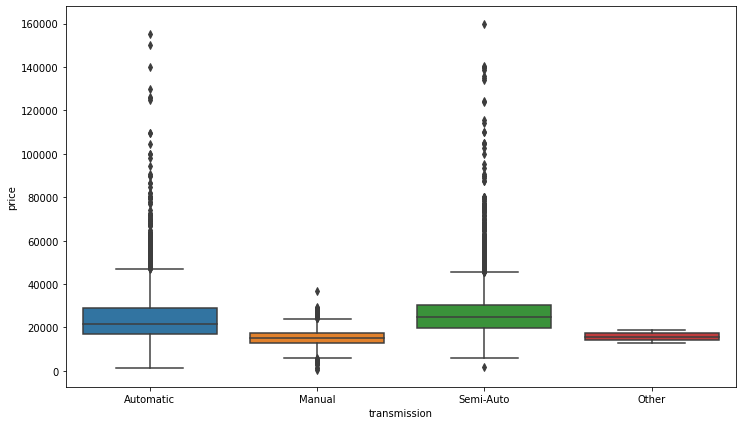

In [5]:
plt.subplots(figsize=(12,7))
sns.boxplot(x=auto_data['transmission'], y=auto_data['price'])

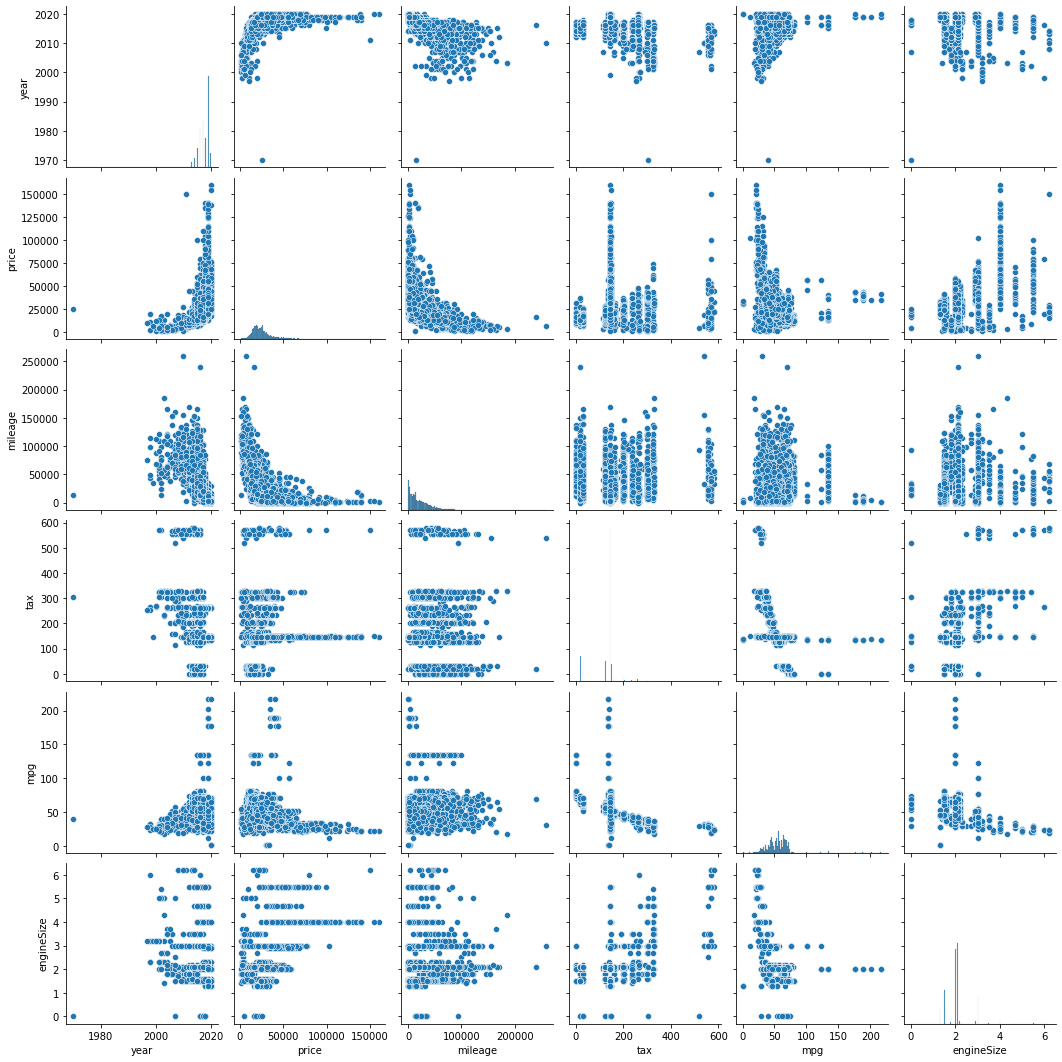

In [6]:
sns.pairplot(auto_data)

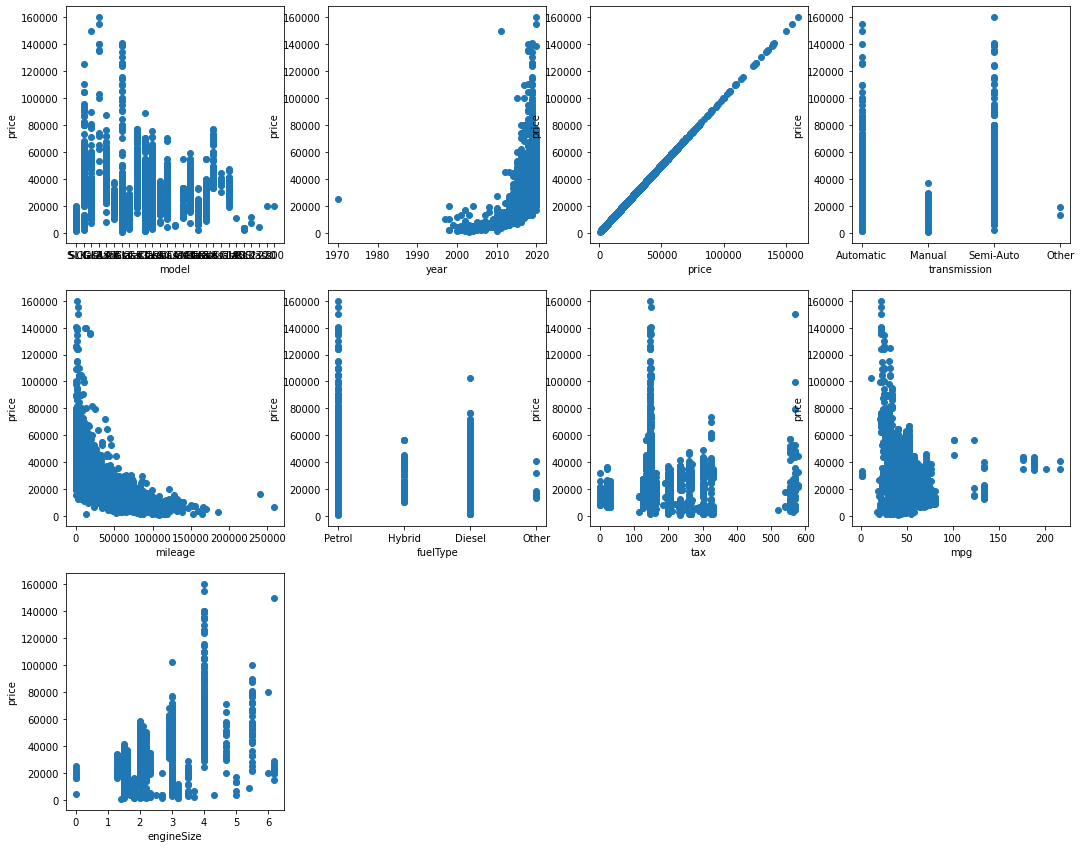

In [7]:
plt.figure(figsize=(18,20))
for i, column in enumerate(auto_data.columns):
    plt.subplot(4, 4, i + 1)
    plt.scatter(auto_data[column], auto_data['price'])
    plt.xlabel(column)
    plt.ylabel('price')

<AxesSubplot:>

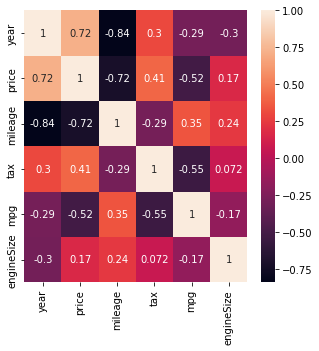

In [8]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(auto_data.corr(method='spearman'), annot=True, ax=ax)

In [9]:
auto_data = pd.get_dummies(auto_data)
auto_data

,year,price,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,...,model_220,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2005,5200,63000,325,32.1,1.8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2017,34948,27000,20,61.4,2.1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016,49948,6200,555,28.0,5.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,61948,16000,325,30.4,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2016,73948,4000,325,30.1,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
13115,2020,24699,2500,145,55.4,2.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
13116,2019,30999,11612,145,41.5,2.1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13117,2019,37990,2426,145,45.6,2.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [10]:
categorical_columns = auto_data.columns[auto_data.dtypes == 'object']
label_enc = LabelEncoder()
for col in categorical_columns:
    auto_data[col] = label_enc.fit_transform(auto_data[col])
auto_data

,year,price,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,...,model_220,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2005,5200,63000,325,32.1,1.8,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2017,34948,27000,20,61.4,2.1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,2016,49948,6200,555,28.0,5.5,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2016,61948,16000,325,30.4,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,2016,73948,4000,325,30.1,4.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13114,2020,35999,500,145,55.4,2.0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
13115,2020,24699,2500,145,55.4,2.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
13116,2019,30999,11612,145,41.5,2.1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
13117,2019,37990,2426,145,45.6,2.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


2. Train / Test Splitting

In [11]:
import sklearn.metrics as metrics

from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [12]:
X, Y = auto_data.drop(['price'], axis=1), auto_data['price']

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)
X_train

,year,mileage,tax,mpg,engineSize,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,model_ CLA Class,...,model_220,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
5967,2018,6361,145,56.5,2.1,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
3913,2018,8400,145,57.7,2.0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
1638,2016,35991,30,64.2,2.1,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4714,2019,5501,145,36.7,2.0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
5217,2020,859,145,32.1,2.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11633,2019,21118,150,37.2,2.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1344,2016,22433,20,74.3,1.5,1,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
12815,2019,11190,150,56.5,2.1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7293,2019,5738,145,53.3,1.3,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [14]:
std_scaler = StandardScaler()

X_train_scaled = std_scaler.fit_transform(X_train)
X_test_scaled = std_scaler.transform(X_test)

X_train_scaled

array([[ 0.31274615, -0.73642647,  0.23107159, ..., -0.11603576,
        -0.02334054, -0.62963609],
       [ 0.31274615, -0.64018022,  0.23107159, ..., -0.11603576,
        -0.02334054, -0.62963609],
       [-0.57215538,  0.66218883, -1.520073  , ..., -0.11603576,
        -0.02334054, -0.62963609],
       ...,
       [ 0.75519692, -0.50848475,  0.30720831, ..., -0.11603576,
        -0.02334054, -0.62963609],
       [ 0.75519692, -0.76583374,  0.23107159, ..., -0.11603576,
        -0.02334054,  1.588219  ],
       [ 0.31274615,  0.05185822,  0.23107159, ..., -0.11603576,
        -0.02334054, -0.62963609]])

3. Baseline Model

In [15]:
def dummy_LR(X_train, X_test, Y_train, Y_test):
    Y_mean = Y_train.mean()
    return np.full(len(Y_test), Y_mean)

dummy_LR_predictions = dummy_LR(X_train, X_test, Y_train, Y_test)
dummy_LR_RMSE = metrics.mean_squared_error(Y_test, dummy_LR_predictions, squared=False)

In [16]:
print('Test std =', Y_test.std())
print('Dummy RMSE =', dummy_LR_RMSE)

Test std = 12330.882324714186
Dummy RMSE = 12331.39228105571


4. Simple Linear Model

In [17]:
simple_LR = LinearRegression()
simple_LR.fit(X_train_scaled, Y_train)
simple_LR_predictions = simple_LR.predict(X_test_scaled)
simple_LR_RMSE = metrics.mean_squared_error(Y_test, simple_LR_predictions, squared=False)
print('Test std =', Y_test.std())
print('Linear Regression RMSE =', simple_LR_RMSE)

Test std = 12330.882324714186
Linear Regression RMSE = 587460232159434.1


Text(0, 0.5, 'Target')

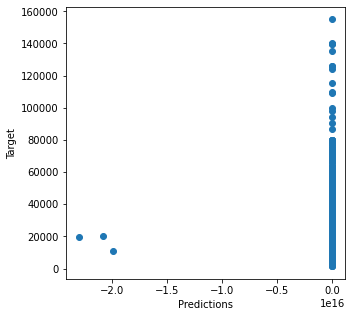

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(simple_LR_predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')

In [19]:
pd.DataFrame(simple_LR.coef_, auto_data.columns[1:], columns=['Coefficients'])

,Coefficients
price,4.218556e+03
mileage,-3.027459e+03
tax,-1.314502e+03
mpg,-2.651884e+03
engineSize,4.914191e+03
model_ A Class,8.038692e+15
model_ B Class,4.246561e+15
model_ C Class,9.170408e+15
model_ CL Class,3.965945e+15
model_ CLA Class,1.677853e+15


5. Regularization

In [20]:
model = Lasso()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Lasso RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns=['Coefficients'])

Lasso RMSE = 6007.6


,Coefficients
price,4225.089844
mileage,-3030.653759
tax,-1297.527293
mpg,-2642.533789
engineSize,4906.110393
model_ A Class,-351.723108
model_ B Class,-677.277139
model_ C Class,-470.790348
model_ CL Class,-300.770248
model_ CLA Class,-87.582863


In [21]:
model = LassoCV(random_state=10)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Lasso CV RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns=['Coefficients'])

Lasso CV RMSE = 6009.999


,Coefficients
price,4215.334524
mileage,-3026.348101
tax,-1264.864951
mpg,-2628.130364
engineSize,4905.680740
model_ A Class,-0.000000
model_ B Class,-486.337734
model_ C Class,-66.989185
model_ CL Class,-121.246882
model_ CLA Class,-7.060914


In [22]:
model = Ridge()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Ridge RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns=['Coefficients'])

Ridge RMSE = 6007.52


,Coefficients
price,4225.660571
mileage,-3031.141477
tax,-1301.026951
mpg,-2643.648550
engineSize,4905.402394
model_ A Class,-448.459113
model_ B Class,-728.839501
model_ C Class,-580.991869
model_ CL Class,-349.062935
model_ CLA Class,-108.589421


In [23]:
model = RidgeCV()

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Ridge CV RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns=['Coefficients'])

Ridge CV RMSE = 6008.78


,Coefficients
price,4219.737789
mileage,-3030.591659
tax,-1295.470807
mpg,-2637.546706
engineSize,4898.829471
model_ A Class,-450.074897
model_ B Class,-728.968672
model_ C Class,-580.537141
model_ CL Class,-348.968307
model_ CLA Class,-108.548742


In [24]:
alphas = np.linspace(1, 10, 20)
alphas

array([ 1.        ,  1.47368421,  1.94736842,  2.42105263,  2.89473684,
        3.36842105,  3.84210526,  4.31578947,  4.78947368,  5.26315789,
        5.73684211,  6.21052632,  6.68421053,  7.15789474,  7.63157895,
        8.10526316,  8.57894737,  9.05263158,  9.52631579, 10.        ])

In [25]:
model = LassoCV(random_state = 10, alphas=alphas)

model.fit(X_train_scaled, Y_train)
predictions = model.predict(X_test_scaled)

print (f'Lasso CV RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.coef_, auto_data.columns[1:], columns=['Coefficients'])

Lasso CV RMSE = 6010.029


,Coefficients
price,4215.204071
mileage,-3026.275737
tax,-1264.410738
mpg,-2627.966394
engineSize,4905.732102
model_ A Class,-0.000000
model_ B Class,-486.338569
model_ C Class,-67.119364
model_ CL Class,-121.227960
model_ CLA Class,-6.989481


6. Random Forest

In [26]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state = 10, n_estimators = 100)

model.fit(X_train, Y_train)
predictions = model.predict(X_test)

print (f'RMSE = {round(metrics.mean_squared_error(Y_test, predictions, squared=False), 3)}')

pd.DataFrame(model.feature_importances_, auto_data.columns[1:], 
             columns=['Importance']).sort_values('Importance')

RMSE = 2594.16


,Importance
model_220,0.000000e+00
model_180,0.000000e+00
model_200,0.000000e+00
model_230,4.582240e-08
model_ R Class,1.331006e-07
transmission_Other,2.748413e-07
model_ CLC Class,1.084438e-06
model_ CLK,4.908766e-06
model_ GLB Class,1.672143e-05
fuelType_Other,1.778091e-05


In [27]:
model.score(X_test, Y_test)

0.9557293754083127

Text(0, 0.5, 'Target')

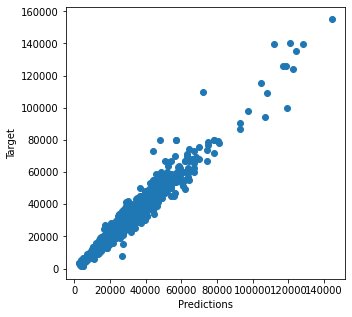

In [28]:
plt.figure(figsize=(5,5))
plt.scatter(predictions, Y_test)
plt.xlabel('Predictions')
plt.ylabel('Target')